In [81]:
#Nama: Faqih Alam
#NIM: 2101221047
#P= (2+1+0+1+2+2+1+0+4+7)x20 = 400

#A

In [82]:
import pandas as pd
import numpy as np
file='/content/drive/MyDrive/Colab Notebooks/UTS SLO/Life Expectancy Data.csv'
X=pd.read_csv(file)
from sklearn.model_selection import train_test_split
X1, X2= train_test_split(X, test_size = 0.5, random_state = 400)
XXX=X2.iloc[400,0]
print(XXX)

Germany


In [83]:
A = X.loc[X['Country']=="Germany"]
print(A)

     Country  Year     Status  Life expectancy  Adult Mortality  \
566  Germany  2014  Developed             89.0               69   
567  Germany  2013  Developed             86.0               71   
568  Germany  2012  Developed             86.0               71   
569  Germany  2011  Developed             85.0               74   
570  Germany  2010  Developed             81.0               76   
571  Germany  2009  Developed             80.0               79   
572  Germany  2008  Developed             79.9                8   
573  Germany  2007  Developed             79.8               82   
574  Germany  2006  Developed             79.6               84   
575  Germany  2005  Developed             79.2               85   
576  Germany  2004  Developed             79.1               86   
577  Germany  2003  Developed             78.5                9   
578  Germany  2002  Developed             78.4               91   
579  Germany  2001  Developed             78.3               9

In [84]:
#A1 absolut hasil korelasi negara Germany dengan ‘Life expectation’

A.corr().iloc[:,1].abs().sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.904975
Year                               0.889633
Income composition of resources    0.816872
infant deaths                      0.735376
Alcohol                            0.733409
Polio                              0.608874
Population                         0.553126
Total expenditure                  0.529701
under-five deaths                  0.515201
GDP                                0.512538
percentage expenditure             0.495003
 thinness  1-19 years              0.437048
 BMI                               0.416723
Hepatitis B                        0.293970
Measles                            0.257724
 thinness 5-9 years                0.252069
Diphtheria                         0.247682
Adult Mortality                    0.041800
 HIV/AIDS                               NaN
Name: Life expectancy, dtype: float64

In [85]:
#A2  angka penyakit polio (kolom ‘Polio’) pada negara Germany

A.loc[:,['Country', 'Year','Polio']].sort_values(by=['Polio'],ascending=True)

,Country,Year,Polio
566,Germany,2014,94
567,Germany,2013,94
568,Germany,2012,94
569,Germany,2011,94
570,Germany,2010,94
574,Germany,2006,94
580,Germany,2000,94
571,Germany,2009,95
572,Germany,2008,95
573,Germany,2007,95


In [86]:
#A3. negara dengan melakukan rata-rata pada tingkat kematian (kolom ‘Adult mortality’) dan satu negara diatas Germany
A3 = X.groupby('Country')['Adult Mortality'].mean().sort_values(ascending=False)#.head(64)
print(A3)


Country
Lesotho                     547.166667
Zimbabwe                    470.800000
Botswana                    460.933333
Central African Republic    444.833333
South Africa                418.400000
                               ...    
Italy                        54.066667
Netherlands                  47.250000
Albania                      45.062500
Equatorial Guinea            32.000000
Tunisia                      19.933333
Name: Adult Mortality, Length: 133, dtype: float64


In [87]:
#Satu negara diatas Germany
print("Index Germany : ")
print(A3.index.get_loc("Germany"))
print("Satu negara diatas Germany (110): ")
print(A3.index[110])

Index Germany : 
111
Satu negara diatas Germany (110): 
Montenegro


#B

In [88]:
#Nama: Faqih Alam
#NIM: 2101221047
#total baris dataset harus berjumlah : (2+1+0+1+2+2+1+0+4+7)x48 = 960

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [90]:
# membaca dataset

B = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UTS SLO/Life Expectancy Data.csv")

Membaca = B.iloc[0:960,:]

In [91]:
#membaca dataset diatas dari baris 0 sampai baris 960, dengan variabel bebas = “Adult Mortality”,”Income composition of resources”,dan ”Schooling”

variabel = Membaca[['Adult Mortality','Income composition of resources','Schooling','Life expectancy']]
variabel.head()

,Adult Mortality,Income composition of resources,Schooling,Life expectancy
0,263,0.479,10.1,65.0
1,271,0.476,10.0,59.9
2,268,0.470,9.9,59.9
3,272,0.463,9.8,59.5
4,275,0.454,9.5,59.2


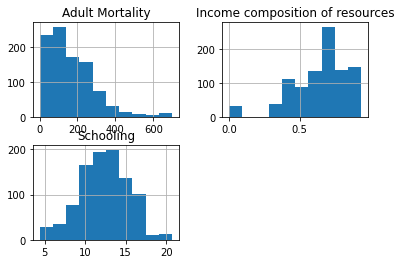

In [92]:
data_histo = variabel[['Adult Mortality','Income composition of resources','Schooling']]
data_histo.hist()
plt.show()

In [93]:
#Pembuatan dataset pelatihan dan pengujian, diketahui pemilihan data latih 70% (0.7)

msk = np.random.rand(len(Membaca)) < 0.7
train = variabel[msk]
test = variabel[~msk]
train

,Adult Mortality,Income composition of resources,Schooling,Life expectancy
0,263,0.479,10.1,65.0
2,268,0.470,9.9,59.9
3,272,0.463,9.8,59.5
4,275,0.454,9.5,59.2
5,279,0.448,9.2,58.8
...,...,...,...,...
951,296,0.333,5.5,52.8
954,57,0.828,14.2,81.1
956,59,0.826,14.8,87.0
957,62,0.819,14.6,83.0


In [94]:
#Metode regresi linier multivariat

from sklearn import linear_model
model = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Adult Mortality','Income composition of resources','Schooling']])
train_y = np.asanyarray(train[['Life expectancy']])
model.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Adult Mortality','Income composition of resources','Schooling']])
test_y = np.asanyarray(test[['Life expectancy']])
test_y_ = model.predict(test_x)

print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Coefficients:  [[-0.03247331 10.99484186  1.08962824]]
Intercept:  [54.75070815]
R2-score: 0.71


In [95]:
#Metode regresi Decision Tree multivariate 
X = variabel.iloc[:, 0:2].values
y = variabel.iloc[:, 3].values
y = y.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 400)

from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

from sklearn.metrics import r2_score

test_y_ = model2.predict(X_test)
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )

R2-score: 0.91


In [96]:
#Metode regresi Support Vector multivariate
X = variabel.iloc[:, 0:2].values
y = variabel.iloc[:, 3].values
y = y.reshape(-1,1)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 400)

from sklearn.svm import SVR
model3 = SVR(kernel = 'linear')
model3.fit(X_train, y_train)
from sklearn.metrics import r2_score
test_y_ = model3.predict(X_test)
test_y=y_test;
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2-score: 0.63


# Berdasarkan perbandingan 3 metode didapatkan nilai R2 Score masing-masing Metode
## Metode regresi linier multivariat : 0.76
## Metode regresi Decision Tree multivariate : 0.91
## Metode regresi Support Vector multivariate : 0.63

### Berdasarkan ketiga metode, metode paling baik untuk dataset ini dilakukan dengan metode regresi Decision Tree multivariate.
